# Regularization

## 1 Explain what is Regularization? 

*To prevent overfetting, Regularisation is used. It adds additional penulty in error function for the tuning. It will result in reduced variance in comparation of the very high variance model for training data set. So, ultimately it make sure the model is more generalised and not overfeeting the training data set. 
Ridge Regression and Lasso Regression are the two Regularisation methods.*

## 2 Explain how regularization is performed in linear regression? 

*The loss function L= Sum(y'-y)2 is to be minimised is the target for the model. In case of ideal model its value is 0 as y' and y will be always same. by adding redudent term in Loss function L1=Sum(y'-y)2 + l |w| or L2= Sum(y'-y)2 + l w^2 add penulty in loss function.*

*In normal liner regression we follow y=mx+c and in multiple linear regression y= m1x1+m2x2+....+c and in polynomial regression y= m1x + m2x^2 +m3x^3 +..... + we use polynomial equation. If we replace x^2 by x2, X^3 by x3 then both 2nd and third equations looks same. So each instead of multiple features we use single feature with various power. So same Multiple linear equation can be applied with various power of same features.*

## 3 Explain what is Ridge and Lasso regression? 

*Ridge and Lasso Regression are types of Regularization techniques. It is  used to deal with overfitting and when the dataset is large. Ridge and Lasso Regression involve adding penalties to the regression function*

**Ridge Regression**
* Performs L2 regularization
* adds penalty equivalent to square of the magnitude of coefficients
* L2 = Cost + α * (sum of square of coefficients)

**Lasso Regression**
* Performs L1 regularization
* adds penalty equivalent to absolute value of the magnitude of coefficients
* L1 = Cost + α * (sum of absolute value of coefficients)

## 4 Perform Ridge and Lasso regression continuing the task of the previous homework

In [ ]:
#load and import all required libraries and functionalities
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from pandas.core.frame import DataFrame

In [ ]:
#Load data from the web, clean it for data frame format and store as row data (in onw row instead of two) in target variable
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep = "\s+", skiprows = 22, header = None)
df = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :3]])
target = raw_df.values[1::2, 2]

In [ ]:
#convert target to data frame format and apply column names for all 14 columns
data = pd.DataFrame(df)
data.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO','B', 'LSTAT', 'MEDV']
data.head(1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.09,1.0,296.0,15.3,396.9,4.98,24.0


In [ ]:
# Selecting the Xdata,X3data,X11data and Y data
Fechers_No_data=len(data.iloc[0])-1
Xdata = data.iloc[:,:Fechers_No_data]  #selecting all columns except "MEDV"
ydata = data.iloc[:,Fechers_No_data:Fechers_No_data+1] #selecting target(price in this case)

#Split into train data and test data
X_train, X_test, y_train, y_test = train_test_split(Xdata, ydata, test_size = 0.25,random_state=43)

# min max scaling the variables
scaler =  RobustScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Ridge**

In [ ]:
ridgeR = Ridge(alpha = 0.01)
ridgeR.fit(X_train_scaled, y_train)
y_pred = ridgeR.predict(X_test_scaled)
 
# calculate mean square error
mean_squared_error_ridge = np.mean((y_pred - y_test)**2)
COD=r2_score(y_pred, y_test)
print('Mean squared error for testing set: %.2f'%mean_squared_error_ridge)
print('Coefficient of determination for testing set: %.2f'%COD)

Mean squared error for testing set: 26.27
Coefficient of determination for testing set: 0.68


**Lasso**

In [ ]:
lasso = Lasso(alpha = 0.01)
lasso.fit(X_train_scaled, y_train)
y_pred = lasso.predict(X_test_scaled)
 
# calculate mean square error
mean_squared_error_lasso = mean_squared_error(y_pred, y_test)
COD_lasso=r2_score(y_pred, y_test)
print('Mean squared error for testing set: %.2f'%mean_squared_error_lasso)
print('Coefficient of determination for testing set: %.2f'%COD_lasso)

Mean squared error for testing set: 26.13
Coefficient of determination for testing set: 0.67


## 5 Perform Ridge and Lasso regression on HCC.csv dataset after performing necessary pre-processing steps as mentioned in the previous homework

In [ ]:
HCC_data=pd.read_csv('HCC.csv')
HCC_data.head()

In [ ]:
HCC_df=HCC_data.iloc[:,1:]
HCC_df.head()

In [ ]:
HCC_df.info()

In [1]:
HCC_df.describe()

NameError: ignored

In [ ]:
HCC_df.isnull().sum()

10 4 40


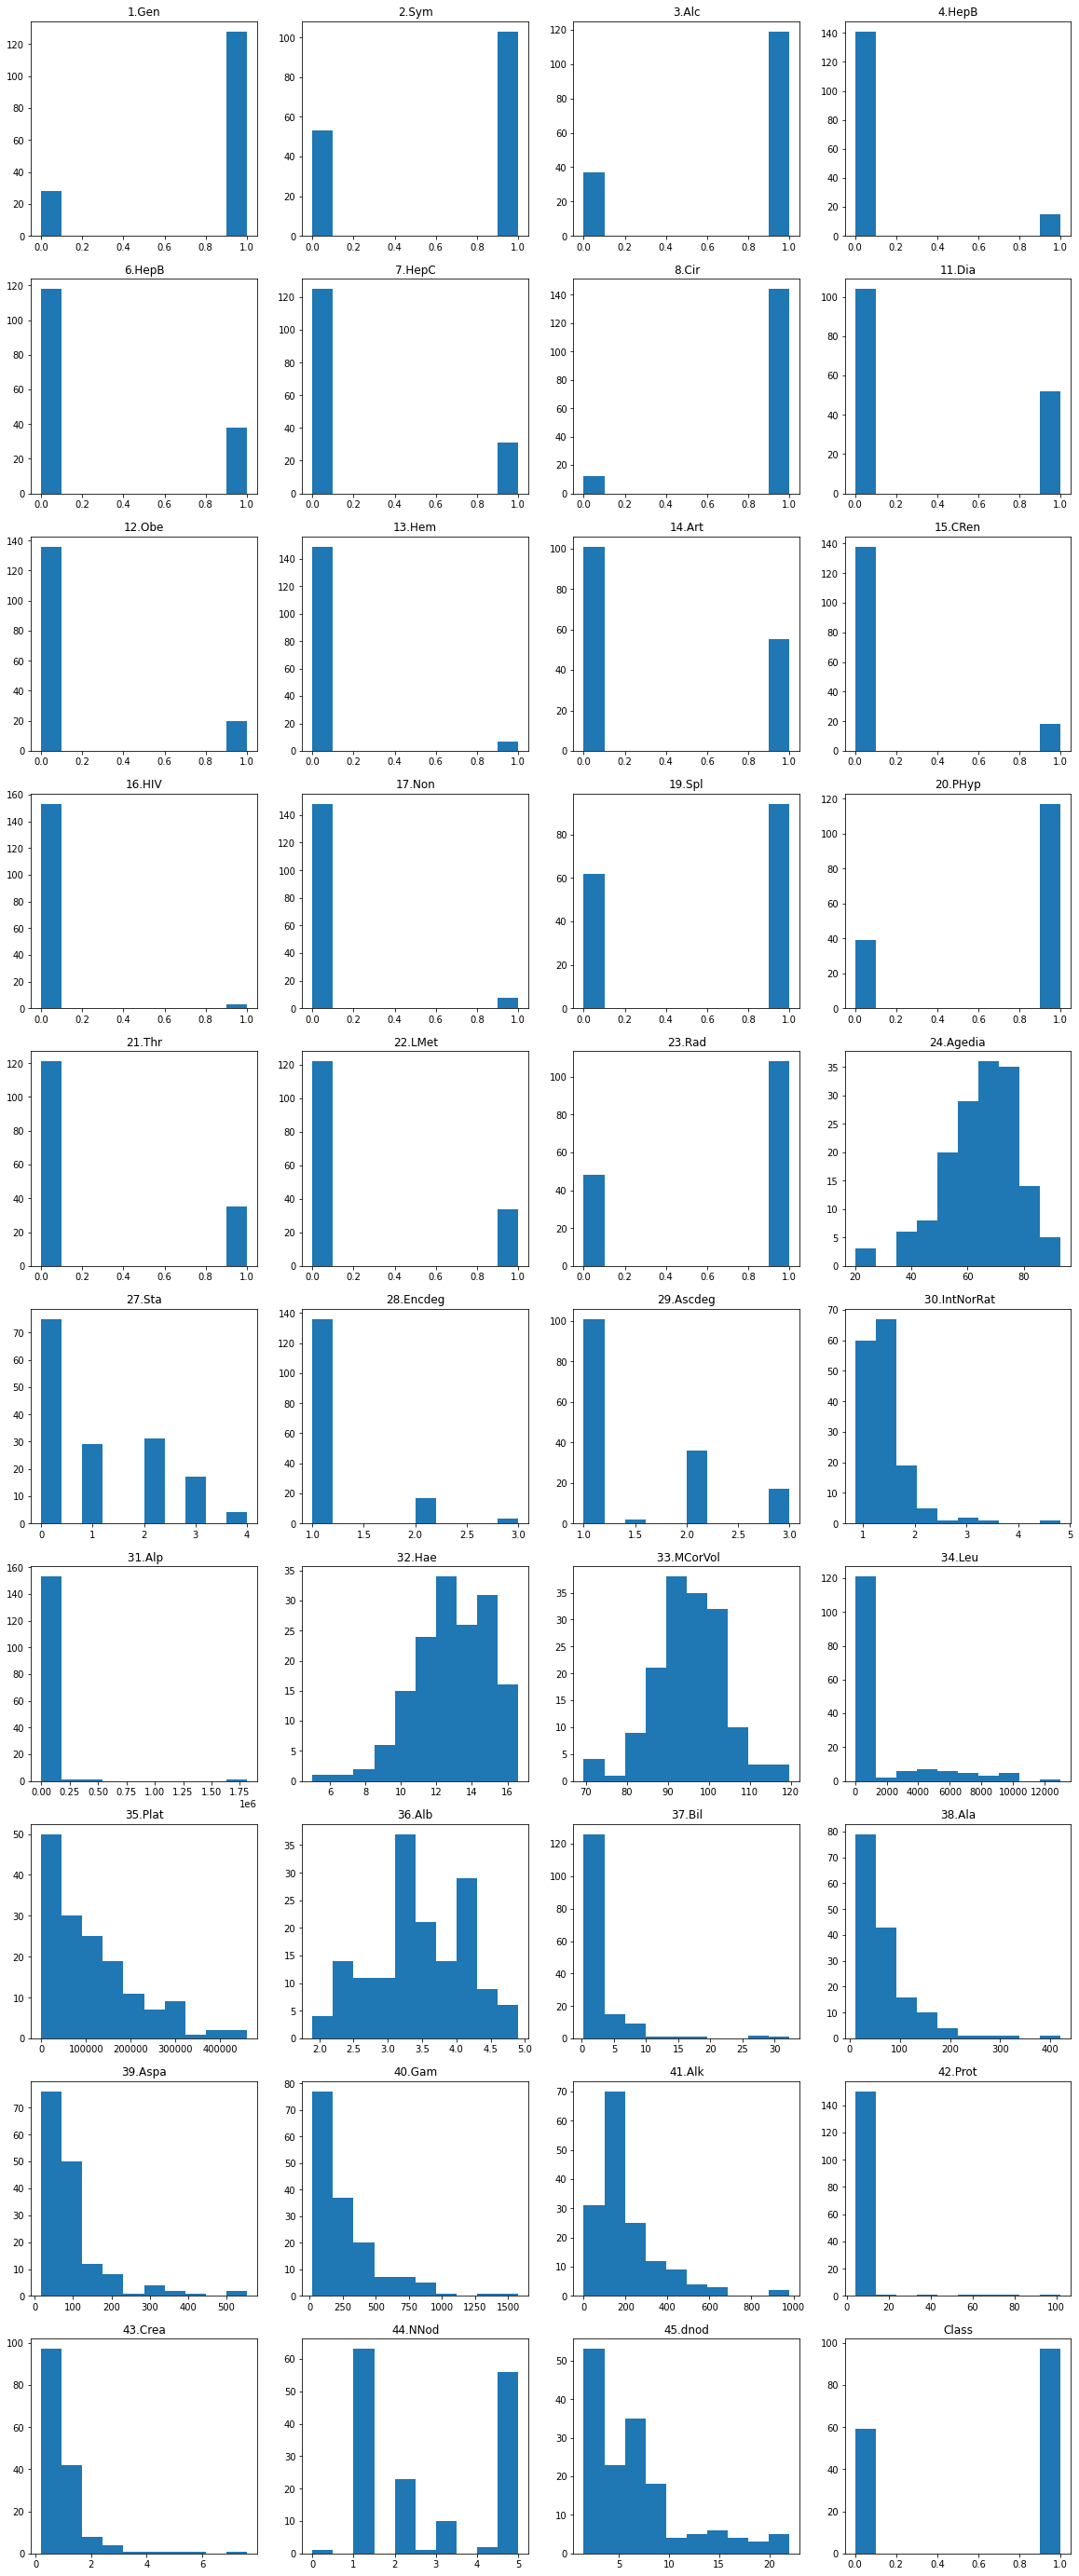

In [ ]:
Columns=4
Rows=len(HCC_df.iloc[0])//Columns
print(Rows,Columns,len(HCC_df.iloc[0]))
fig, axs = plt.subplots(Rows,Columns,figsize=(20,50))
for i in range(len(HCC_df.iloc[0])):
  axs[i//((Rows-1)//2),i%Columns].set_title(HCC_df.columns[i])
  axs[i//((Rows-1)//2),i%Columns].hist(HCC_df.iloc[:,i])

10 4 40


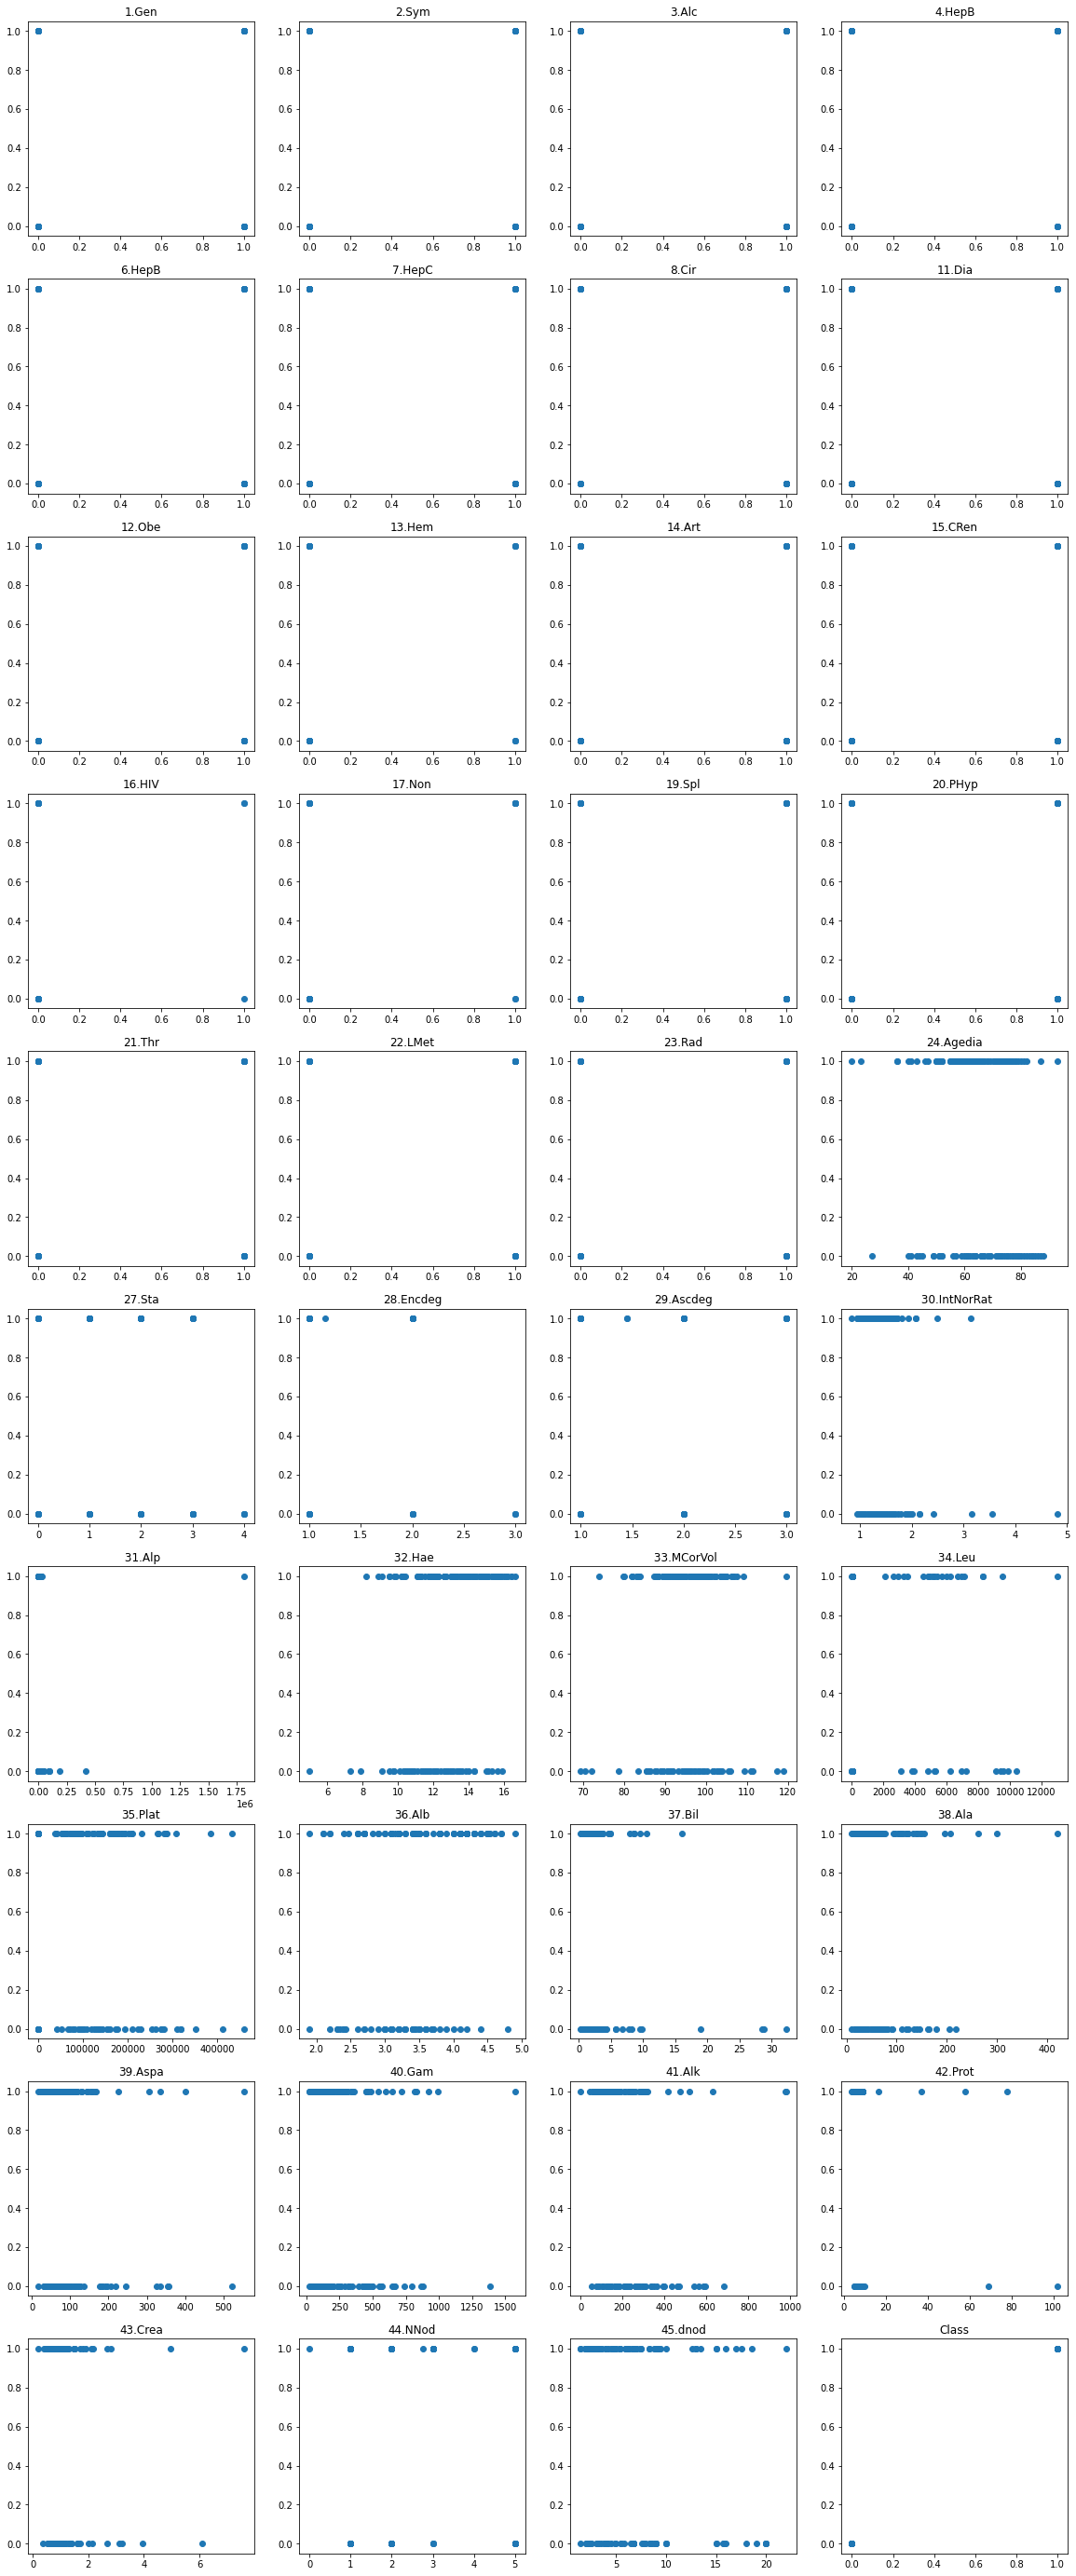

In [ ]:
Columns=4
Rows=len(HCC_df.iloc[0])//Columns
print(Rows,Columns,len(HCC_df.iloc[0]))
fig, axs = plt.subplots(Rows,Columns,figsize=(20,50))
for i in range(len(HCC_df.iloc[0])):
  axs[i//((Rows-1)//2),i%Columns].set_title(HCC_df.columns[i])
  axs[i//((Rows-1)//2),i%Columns].scatter(HCC_df.iloc[:,i],HCC_df.iloc[:,len(HCC_df.iloc[0])-1])

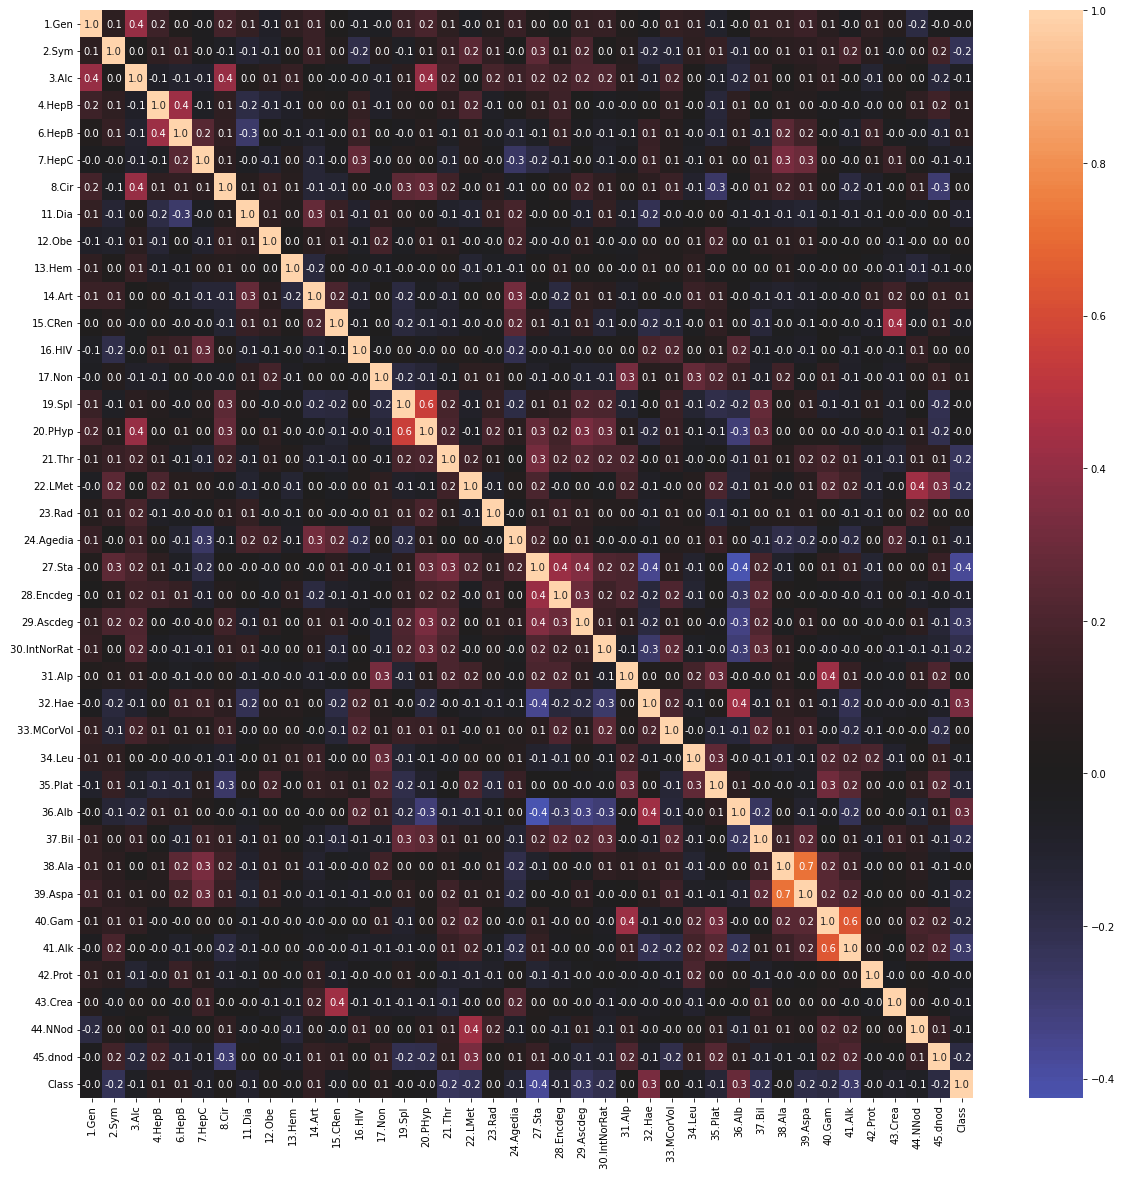

In [ ]:
# use covariance to check relation between each feature with other with pearson correlation matrix
corrs=HCC_df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corrs,annot=True,fmt='0.1f',center=0)

In [ ]:
#Selection of features which has greater then "thr_high" correlation with Class
thr_high=0.2
Fechs_No=len(corrs)-1
Selected_data=pd.DataFrame()
for i in range(Fechs_No):
  if(abs(corrs.iloc[i,Fechs_No])>thr_high):
    print(corrs.iloc[i,Fechs_No],corrs.columns[i],i)
    Selected_data[corrs.columns[i]]=HCC_df.iloc[:,i:i+1]
Selected_data.head()

-0.2245304804741655 2.Sym 1
-0.24598326564559858 21.Thr 16
-0.22864091214019014 22.LMet 17
-0.3673759151092121 27.Sta 20
-0.2561603067650455 29.Ascdeg 22
-0.2031414437584977  30.IntNorRat 23
0.33059009748674517  32.Hae 25
0.28655277489060427 36.Alb 29
-0.21276794000847923 37.Bil 30
-0.26905804607589723 41.Alk 34


,2.Sym,21.Thr,22.LMet,27.Sta,29.Ascdeg,30.IntNorRat,32.Hae,36.Alb,37.Bil,41.Alk
0,0.0,0.0,0.0,0,1.0,1.53,13.7,3.4,2.1,150.0
1,0.0,0.0,1.0,2,2.0,0.96,8.9,3.3,0.4,109.0
2,1.0,0.0,1.0,0,1.0,0.95,13.4,3.7,0.4,174.0
3,1.0,0.0,0.0,0,1.0,0.94,14.3,4.1,0.7,109.0
4,0.0,0.0,0.0,1,2.0,1.58,13.4,3.4,3.5,396.0


In [ ]:
# Selecting the Xdata,X3data,X11data and Y data
Fechers_No_data=len(Selected_data.iloc[0])
Xdata = Selected_data.iloc[:,:]
ydata = HCC_df['Class']

#Split into train data and test data
X_train, X_test, y_train, y_test = train_test_split(Xdata, ydata, test_size = 0.25,random_state=11)

# min max scaling the variables
scaler =  MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Ridge**

In [ ]:
#Threshold in Binary decision with sigmoid
Threshold_sigmoid=0.65

ridgeR = Ridge(alpha =0.01)
ridgeR.fit(X_train_scaled, y_train)
y_pred = ridgeR.predict(X_test_scaled)
 
# calculate mean square error
y_pred=1/(1 + np.exp(-y_pred))
y_pred= (y_pred > Threshold_sigmoid).astype(int)
mean_squared_error_ridge = np.mean((y_pred - y_test)**2)
print('Mean squared error for testing set: %.2f'%mean_squared_error_ridge)

accuracy = accuracy_score(y_pred,y_test)
print('accuracy: ',accuracy)

HCC_cm = confusion_matrix(y_pred,y_test)
print(HCC_cm)

HCC_cm = classification_report(y_pred,y_test)
print(HCC_cm)

Mean squared error for testing set: 0.28
accuracy:  0.717948717948718
[[13  6]
 [ 5 15]]
              precision    recall  f1-score   support

           0       0.72      0.68      0.70        19
           1       0.71      0.75      0.73        20

    accuracy                           0.72        39
   macro avg       0.72      0.72      0.72        39
weighted avg       0.72      0.72      0.72        39



In [ ]:
#Threshold in Binary decision with sigmoid
Threshold_sigmoid=0.65

lasso = Lasso(alpha = 0.01)
lasso.fit(X_train_scaled, y_train)
y_pred = lasso.predict(X_test_scaled)
 
# calculate mean square error
y_pred=1/(1 + np.exp(-y_pred))
y_pred= (y_pred > Threshold_sigmoid).astype(int)

# calculate mean square error
mean_squared_error_lasso = mean_squared_error(y_pred, y_test)
print('Mean squared error for testing set: %.2f'%mean_squared_error_lasso)
accuracy = accuracy_score(y_pred,y_test)
print('accuracy: ',accuracy)

HCC_cm = confusion_matrix(y_pred,y_test)
print(HCC_cm)

HCC_cm = classification_report(y_pred,y_test)
print(HCC_cm)

Mean squared error for testing set: 0.26
accuracy:  0.7435897435897436
[[13  5]
 [ 5 16]]
              precision    recall  f1-score   support

           0       0.72      0.72      0.72        18
           1       0.76      0.76      0.76        21

    accuracy                           0.74        39
   macro avg       0.74      0.74      0.74        39
weighted avg       0.74      0.74      0.74        39



#**For my own Practice - Additonal Work**
#6. Polynomial Regression on Previous HW data

In [ ]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
#Load data from the web, clean it for data frame format and store as row data (in onw row instead of two) in target variable
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep = "\s+", skiprows = 22, header = None)
df = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :3]])
target = raw_df.values[1::2, 2]
#convert target to data frame format and apply column names for all 14 columns
data = pd.DataFrame(df)
data.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO','B', 'LSTAT', 'MEDV']
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
# use covariance to check relation between each feature with other with pearson correlation matrix
corrs=data.corr()

#Selection of the best feature which has highest value
thr_high=0.7
Fechs_No=len(corrs)-1
data_3=pd.DataFrame()
for i in range(Fechs_No):
  if(abs(corrs.iloc[i,Fechs_No])>thr_high):
    data_3[corrs.columns[i]]=data.iloc[:,i:i+1]
data_3.head()

# Selecting the Xdata,X3data,X11data and Y data
Fechers_No_data=len(data.iloc[0])-1
Fechers_No_data3=len(data_3.iloc[0])
Xdata_3 = data_3.iloc[:,:Fechers_No_data3]  #selecting all columns except "MEDV"
ydata = data.iloc[:,Fechers_No_data:Fechers_No_data+1] #selecting target(price in this case)

#Split into train data and test data
X3_train, X3_test, y3_train, y3_test = train_test_split(Xdata_3, ydata, test_size = 0.25,random_state=11)

# min max scaling the variables
scaler3 =  MinMaxScaler()
scaler3.fit(X3_train)
X3_train_scaled = scaler3.transform(X3_train)
X3_test_scaled = scaler3.transform(X3_test)

In [ ]:
# PolynomialFeatures (prepreprocessing)
DegreeOfPoly=2
poly = PolynomialFeatures(degree=DegreeOfPoly)
X_train_poly_scalled = poly.fit_transform(X3_train_scaled)
X_test__poly_scalled = poly.fit_transform(X3_test_scaled)
lnrregressor = LinearRegression()
lnrregressor.fit(X_train_poly_scalled,y3_train)
y_test_pred=lnrregressor.predict(X_test__poly_scalled)
MSE=mean_squared_error(y3_test, y_test_pred)
COD=r2_score(y3_test, y_test_pred)
print('Mean squared error for testing set: %.2f'%MSE)
print('Coefficient of determination for testing set: %.2f'%COD)

Mean squared error for testing set: 33.27
Coefficient of determination for testing set: 0.59
